### Import pandas and read in the csv file and set it to a dataframe called baskets

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

### read in data, make columns for date, year, month, day, hour, weekday, from the "placed_at" column 

In [2]:
filename = './AwanTunai_transaction_data.csv'
baskets = pd.read_csv(filename)

### Transformations
 - adding new columns: spent on SKU
 - transform the string field of "placed_at" into various time and date units: year, month, week, date, day of week, etc.

 - adding a column for spent: obtained by multiplying quantity (qty) and price

In [3]:
baskets["spent"] = baskets["qty"] * baskets["price"]

 - convert "placed_at" into various time units

In [4]:
from datetime import datetime, timedelta

baskets['datetime'] = pd.to_datetime(baskets['placed_at'])
baskets['year'] = baskets["datetime"].dt.year
baskets['month'] = baskets["datetime"].dt.month
baskets['date'] = baskets["datetime"].dt.date
baskets['day'] = baskets["datetime"].dt.day
baskets['hour'] = baskets["datetime"].dt.hour
baskets['weekday'] = baskets["datetime"].dt.weekday
baskets['year_month'] = baskets["datetime"].apply(lambda t: t.strftime("%Y-%m"))
baskets['month_num'] = (baskets['year'] - 2021) * 12 + baskets['month']
baskets['year_week'] = baskets["datetime"].apply(lambda t: t.strftime("%Y-%W")) # this makes the beginning of Jan 2022 as week 2022-00 , not 2022-52
baskets['week_num'] = baskets["datetime"].apply(lambda t: int(t.strftime("%W"))) 
baskets['iso_week_num'] = baskets["datetime"].dt.isocalendar().week # this returns week number 52 for Jan 1, 2021, not 0 which is what we want
baskets['cum_week_num'] = (baskets['year'] - 2021) * 52 + baskets['week_num']

In [5]:
baskets.head()

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
0,1,1,2021-06-17 14:00:31.373,9,10,27.0,86.0,2,343000.0,686000.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
1,2,1,2021-06-17 14:00:31.373,9,6,27.0,86.0,1,159000.0,159000.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
2,3,1,2021-06-17 14:00:31.373,9,14,27.0,86.0,2,225000.0,450000.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
3,4,1,2021-06-17 14:00:31.373,9,5,27.0,86.0,1,246000.0,246000.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
4,5,2,2021-06-17 14:29:31.918,10,15,27.0,86.0,5,19500.0,97500.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24


 - inspect the results
 - usually at the time boundaries: beginning or ending of the time units: beginning of 2022 or end of 2021 and 2022

 - use of "query" syntax

In [6]:
baskets.query("year_month == '2021-12'")

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
89862,89864,8568,2021-12-01 00:19:40.609,49,971,27.0,86.0,10,18300.0,183000.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
89863,89865,8568,2021-12-01 00:19:40.609,49,867,27.0,86.0,1,180500.0,180500.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
89864,89866,8568,2021-12-01 00:19:40.609,49,1338,27.0,86.0,1,180500.0,180500.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
89865,89867,8568,2021-12-01 00:19:40.609,49,851,27.0,86.0,5,12900.0,64500.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
89866,89868,8568,2021-12-01 00:19:40.609,49,1313,27.0,86.0,5,14700.0,73500.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118578,118594,11165,2021-12-31 17:51:37.641,38,976,27.0,86.0,5,12200.0,61000.0,...,2021-12-31,31,17,4,2021-12,12,2021-52,52,52,52
118579,118595,11165,2021-12-31 17:51:37.641,38,979,27.0,86.0,5,20300.0,101500.0,...,2021-12-31,31,17,4,2021-12,12,2021-52,52,52,52
118580,118596,11165,2021-12-31 17:51:37.641,38,1059,10.0,45.0,1,95000.0,95000.0,...,2021-12-31,31,17,4,2021-12,12,2021-52,52,52,52
118581,118597,11165,2021-12-31 17:51:37.641,38,660,14.0,34.0,4,10500.0,42000.0,...,2021-12-31,31,17,4,2021-12,12,2021-52,52,52,52


In [7]:
baskets.query("year_month == '2022-01'")

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
118583,118609,11169,2022-01-02 08:41:25.676,191,899,5.0,86.0,3,31500.0,94500.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
118584,118610,11169,2022-01-02 08:41:25.676,191,972,27.0,86.0,1,369000.0,369000.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
118585,118611,11169,2022-01-02 08:41:25.676,191,1217,27.0,86.0,3,30000.0,90000.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
118586,118612,11169,2022-01-02 08:41:25.676,191,874,27.0,86.0,1,160500.0,160500.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
118587,118613,11169,2022-01-02 08:41:25.676,191,1504,27.0,86.0,1,239000.0,239000.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150123,150131,14163,2022-01-31 17:05:15.920,126,874,27.0,86.0,1,163000.0,163000.0,...,2022-01-31,31,17,0,2022-01,13,2022-05,5,5,57
150124,150132,14163,2022-01-31 17:05:15.920,126,971,27.0,86.0,10,18700.0,187000.0,...,2022-01-31,31,17,0,2022-01,13,2022-05,5,5,57
150125,150133,14163,2022-01-31 17:05:15.920,126,992,27.0,86.0,1,250000.0,250000.0,...,2022-01-31,31,17,0,2022-01,13,2022-05,5,5,57
150126,150134,14163,2022-01-31 17:05:15.920,126,1504,27.0,86.0,1,240500.0,240500.0,...,2022-01-31,31,17,0,2022-01,13,2022-05,5,5,57


 - simple functions
 - count of frequency
 - get the median

In [8]:
freq = baskets['merchant_id'].value_counts()
print(freq)

191    128856
11      28605
59      10496
133      6907
52       6885
        ...  
186         6
305         3
225         2
8           1
7           1
Name: merchant_id, Length: 357, dtype: int64


In [9]:
baskets.price.median()

76500.0

### Study of merchants
 - how many merchants?
  - by each year
  - by each month
  - by each weekday
 - how often did they buy?
  - how many times did they buy
  - how many months did they buy?

 - what did they buy?
   - their unique SKU
   - their top SKU
 - how much did they spend?

In [10]:
### how many merchants

In [11]:
baskets.groupby(['year']).nunique()

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
year,,,,,,,,,,,,,,,,,,,,,
2021,118583,11152,11149,238,1710,35,105,88,939,1741,...,188,31,20,7,7,7,29,29,29,29
2022,373854,42286,42285,333,1192,32,93,56,1236,2895,...,356,31,24,7,12,12,53,53,52,53


 - number of merchants by month

In [12]:
baskets.groupby(['year_month']).nunique()

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,month,date,day,hour,weekday,month_num,year_week,week_num,iso_week_num,cum_week_num
year_month,,,,,,,,,,,,,,,,,,,,,
2021-06,2888,338,338,14,458,31,70,44,339,524,...,1,8,8,11,5,1,3,3,3,3
2021-07,10494,1056,1056,11,558,33,78,48,408,714,...,1,29,29,12,7,1,5,5,5,5
2021-08,7681,843,843,3,534,32,75,51,342,624,...,1,30,30,11,7,1,6,6,6,6
2021-09,9136,1063,1063,48,548,33,75,48,379,670,...,1,30,30,11,7,1,5,5,5,5
2021-10,31897,2907,2904,196,1480,35,103,69,580,878,...,1,30,30,16,7,1,5,5,5,5
2021-11,27766,2429,2429,182,971,32,89,31,402,851,...,1,30,30,19,7,1,5,5,5,5
2021-12,28721,2516,2516,185,959,32,88,36,505,1084,...,1,31,31,19,7,1,5,5,5,5
2022-01,31545,2994,2994,205,993,32,89,31,550,1153,...,1,30,30,21,7,1,6,6,6,6
2022-02,27985,2824,2824,206,975,32,88,30,491,1029,...,1,27,27,20,7,1,5,5,5,5


### on average, how many merchants transact on each weekday?

 - use of agg 

In [13]:
baskets.groupby(['date','weekday']).agg(
    num_merchants = ('merchant_id', 'nunique')).reset_index().groupby('weekday').mean()

,num_merchants
weekday,
0,51.597403
1,45.906667
2,46.166667
3,44.887500
4,45.814815
5,48.784810
6,43.270270


 - or do it another way

In [14]:
pd.DataFrame({'merchant_cnt' : baskets.groupby(['date','weekday'])['merchant_id'].nunique()}).reset_index().groupby(['weekday'])['merchant_cnt'].mean()

weekday
0    51.597403
1    45.906667
2    46.166667
3    44.887500
4    45.814815
5    48.784810
6    43.270270
Name: merchant_cnt, dtype: float64

### compute various attributes about each merchant

 - use a function

In [15]:
def get_merchant_attributes(baskets):
    merchant_attributes = baskets.groupby(['merchant_id']).agg(
        total_spent = ('spent', 'sum'), 
        num_orders = ('order_id', 'nunique'), 
        first_month = ('month_num', 'min'), 
        last_month = ('month_num', 'max'), 
        num_months = ('month_num', 'nunique'), 
        num_weeks = ('week_num', 'nunique'), 
        num_days = ('date', 'nunique'), 
        num_skus = ('sku_id','nunique'), 
        num_top_cats = ('top_cat','nunique'), 
        num_sub_cats = ('sub_cat','nunique'),
    ).reset_index()
    merchant_attributes['avg_spent_per_order'] = merchant_attributes.total_spent / merchant_attributes.num_orders
    merchant_attributes['tenure_month'] = merchant_attributes.last_month - merchant_attributes.first_month +1
    return merchant_attributes

 - the above function assumes that baskets already has all the date columns, let's make a function for adding those date columns to baskets

In [16]:
def add_date_cols(baskets):
    baskets['datetime'] = pd.to_datetime(baskets['placed_at'])
    baskets['year'] = baskets["datetime"].dt.year
    baskets['month'] = baskets["datetime"].dt.month
    baskets['date'] = baskets["datetime"].dt.date
    baskets['day'] = baskets["datetime"].dt.day
    baskets['hour'] = baskets["datetime"].dt.hour
    baskets['weekday'] = baskets["datetime"].dt.weekday
    baskets['year_month'] = baskets["datetime"].apply(lambda t: t.strftime("%Y-%m"))
    baskets['month_num'] = (baskets['year'] - 2021) * 12 + baskets['month']
    baskets['year_week'] = baskets["datetime"].apply(lambda t: t.strftime("%Y-%W")) # this makes the beginning of Jan 2022 as week 2022-00 , not 2022-52
    baskets['week_num'] = baskets["datetime"].apply(lambda t: int(t.strftime("%W"))) 
    baskets['iso_week_num'] = baskets["datetime"].dt.isocalendar().week # this returns week number 52 for Jan 1, 2021, not 0 which is what we want
    baskets['cum_week_num'] = (baskets['year'] - 2021) * 52 + baskets['week_num']
    return baskets

In [17]:
filename = './AwanTunai_transaction_data.csv'
baskets = pd.read_csv(filename)
baskets["spent"] = baskets["qty"] * baskets["price"]
baskets = add_date_cols(baskets)
merchant_attributes = get_merchant_attributes(baskets)

In [18]:
merchant_attributes.head()

,merchant_id,total_spent,num_orders,first_month,last_month,num_months,num_weeks,num_days,num_skus,num_top_cats,num_sub_cats,avg_spent_per_order,tenure_month
0,1,11802400.0,11,13,21,4,6,8,52,12,19,1.072945e+06,9
1,2,16119100.0,13,12,24,6,10,11,53,13,21,1.239931e+06,13
2,3,38055700.0,37,11,16,6,13,26,145,24,43,1.028532e+06,6
3,4,1021000.0,2,19,20,2,2,2,9,5,5,5.105000e+05,2
4,5,2688000.0,2,13,18,2,2,2,20,7,9,1.344000e+06,6


In [19]:
### manual inspection to double chefck

In [20]:
baskets.query("merchant_id ==1")

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
144899,144924,13662,2022-01-27 13:30:34.838,1,1744,12.0,1.0,1,89000.0,89000.0,...,2022-01-27,27,13,3,2022-01,13,2022-04,4,4,56
217332,217354,21239,2022-04-08 10:42:37.173,1,1498,27.0,86.0,1,251500.0,251500.0,...,2022-04-08,8,10,4,2022-04,16,2022-14,14,14,66
217333,217355,21239,2022-04-08 10:42:37.173,1,992,27.0,86.0,1,250500.0,250500.0,...,2022-04-08,8,10,4,2022-04,16,2022-14,14,14,66
217334,217356,21239,2022-04-08 10:42:37.173,1,1589,26.0,39.0,1,47000.0,47000.0,...,2022-04-08,8,10,4,2022-04,16,2022-14,14,14,66
217335,217357,21239,2022-04-08 10:42:37.173,1,1004,15.0,34.0,1,29000.0,29000.0,...,2022-04-08,8,10,4,2022-04,16,2022-14,14,14,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389568,389573,41132,2022-09-27 13:47:20.418,1,1208,27.0,86.0,5,30500.0,152500.0,...,2022-09-27,27,13,1,2022-09,21,2022-39,39,39,91
389569,389574,41132,2022-09-27 13:47:20.418,1,923,27.0,86.0,1,302000.0,302000.0,...,2022-09-27,27,13,1,2022-09,21,2022-39,39,39,91
389570,389575,41132,2022-09-27 13:47:20.418,1,697,27.0,86.0,1,152000.0,152000.0,...,2022-09-27,27,13,1,2022-09,21,2022-39,39,39,91
389571,389576,41132,2022-09-27 13:47:20.418,1,1655,18.0,61.0,3,36000.0,108000.0,...,2022-09-27,27,13,1,2022-09,21,2022-39,39,39,91


### let's make some plots that could help get more sense about the data
 - total spent by week, by all merchants

<AxesSubplot:xlabel='year_week'>

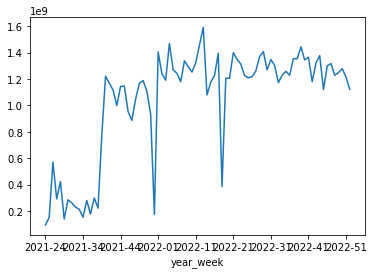

In [21]:
baskets.groupby("year_week").spent.sum().plot()

 - use plt.figure(figsize=(10,5))  to set size, or put figsize=(10,5) as argument into the plot function

<AxesSubplot:xlabel='year_week'>

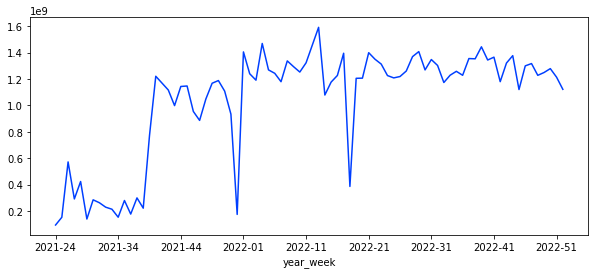

In [52]:
plt.figure(figsize=(10,4))
baskets.groupby("year_week").spent.sum().plot()

 - notice the relative scale changed due to expanding the plot area to wider, the two dips appear less drastic

<AxesSubplot:xlabel='year_week'>

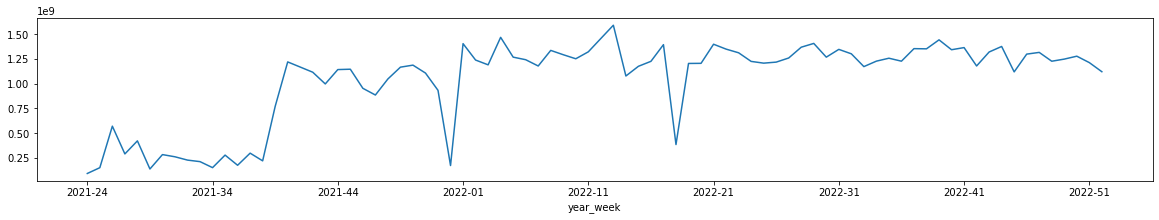

In [23]:
baskets.groupby("year_week").spent.sum().plot(figsize=(20,3))

<AxesSubplot:xlabel='year_week'>

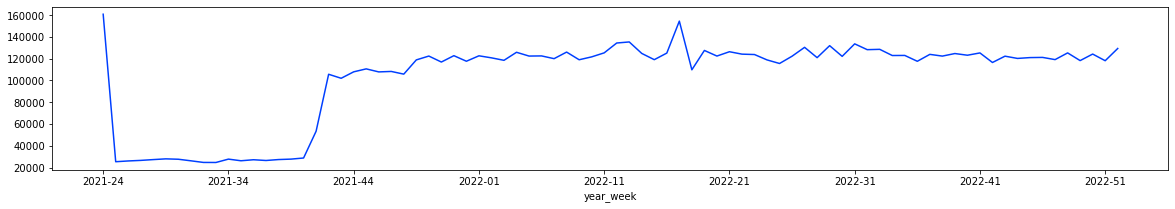

In [49]:
baskets.groupby("year_week").price.mean().plot(figsize=(20,3))

 - compare total spent with number of merchants, they align well

<AxesSubplot:xlabel='year_week'>

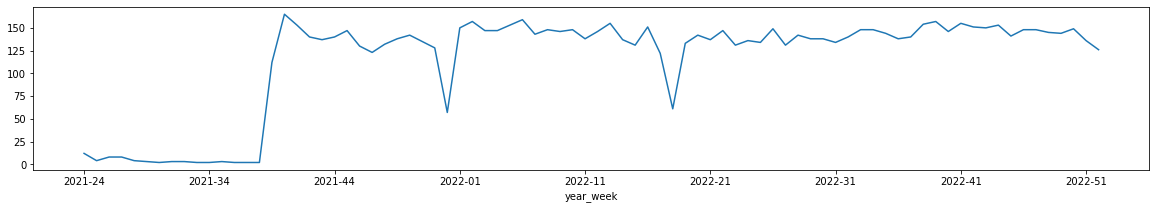

In [24]:
baskets.groupby("year_week").merchant_id.nunique().plot(figsize=(20,3))

<AxesSubplot:xlabel='year_week'>

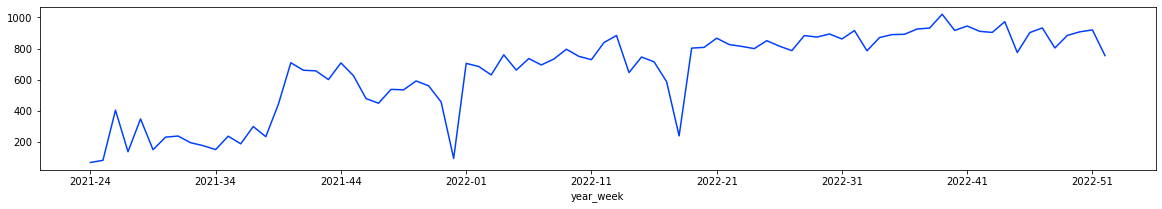

In [64]:
baskets.groupby(['year_week']).nunique().order_id.plot(figsize=(20,3))

 - number of orders and number of merchants seem to align well

 - expand into by day (increase time resolution)

<AxesSubplot:xlabel='date'>

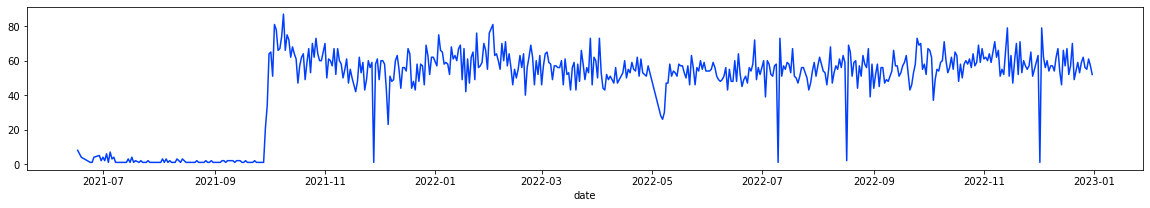

In [48]:
baskets.groupby("date").merchant_id.nunique().plot(figsize=(20,3))

<AxesSubplot:xlabel='date'>

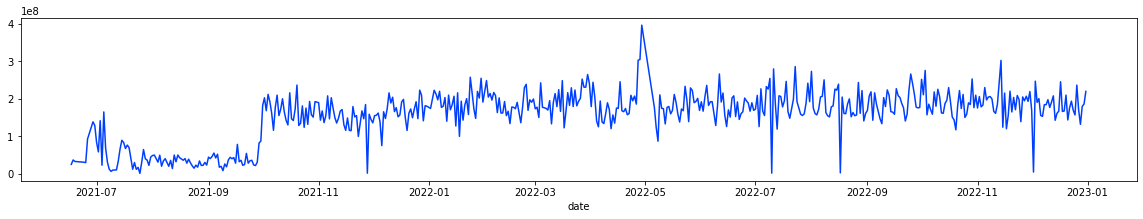

In [47]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).sum().spent.plot(figsize=(20,3))

 - plot as bars

<AxesSubplot:xlabel='year_week'>

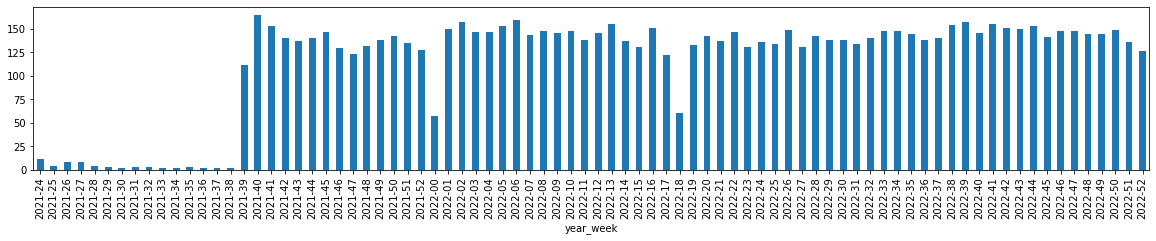

In [26]:
baskets.groupby("year_week").merchant_id.nunique().plot.bar(x="date",figsize=(20,3))

<AxesSubplot:xlabel='date'>

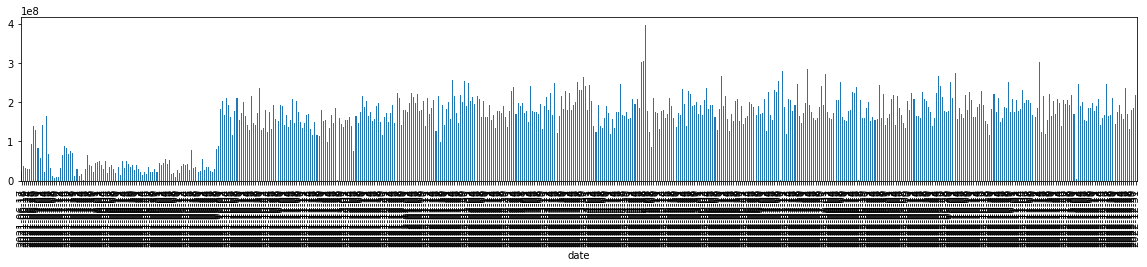

In [28]:
baskets.groupby("date").spent.sum().plot.bar(x="date",figsize=(20,3))

<AxesSubplot:>

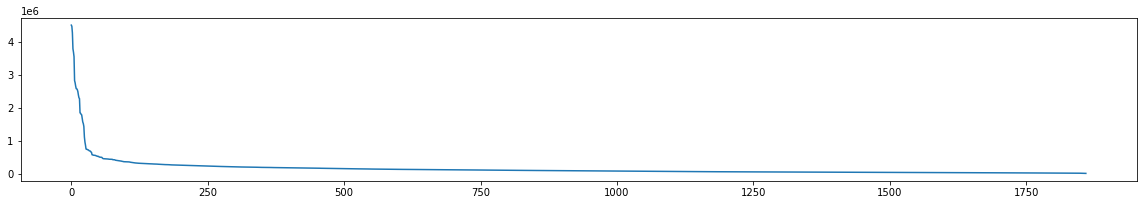

In [30]:
baskets.groupby("sku_id")['spent'].mean().sort_values(ascending=False).reset_index(drop=True).plot(figsize=(20,3))

### what can be observed from those plot? 
 - there are a bit less than 2 thousands SKUs
 - less than 10 percents of the SKUs contribute to the majority of the spent

In [31]:
baskets.groupby("sku_id")['spent'].max().sort_values(ascending=False).reset_index().head(10)

,sku_id,spent
0,207,28356000.0
1,1502,25050000.0
2,970,22530000.0
3,865,18575000.0
4,874,16175000.0
5,990,15030000.0
6,1737,11835000.0
7,872,10335000.0
8,1736,8715000.0
9,975,8190000.0


 - inspect the prices of a few top items

<AxesSubplot:xlabel='date'>

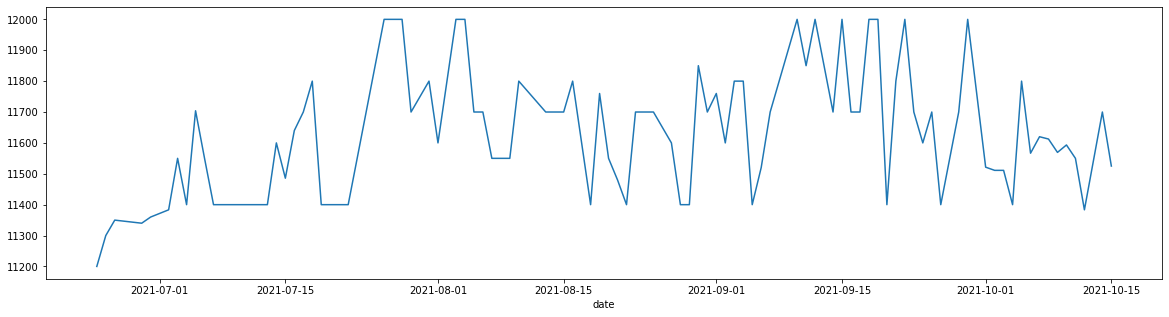

In [32]:
baskets.query("sku_id==207").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

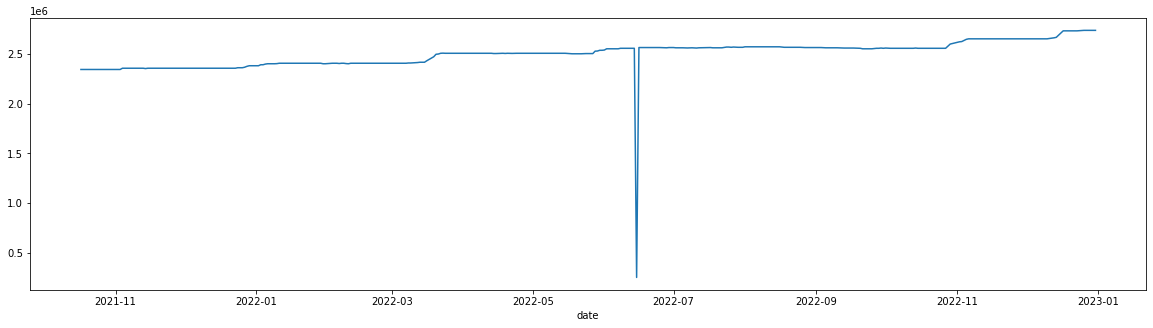

In [33]:
baskets.query("sku_id==1502").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

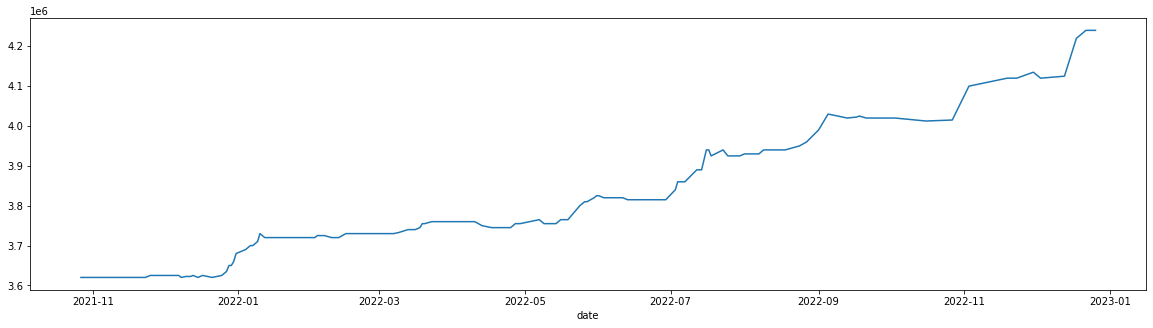

In [34]:
baskets.query("sku_id==970").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

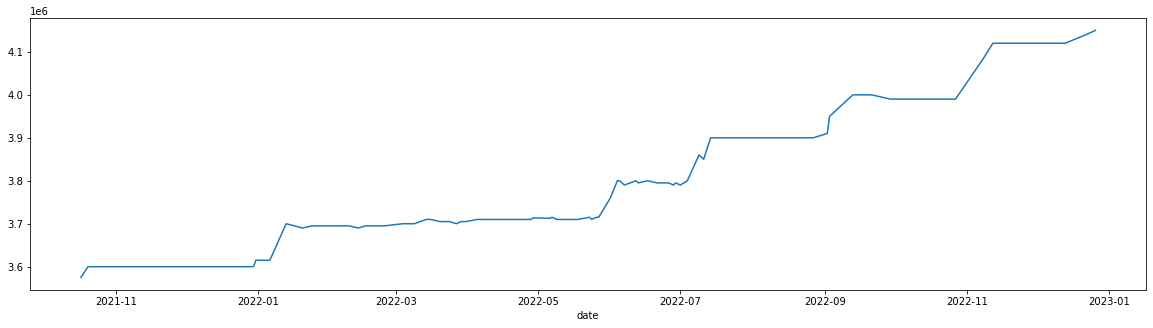

In [35]:
baskets.query("sku_id==865").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

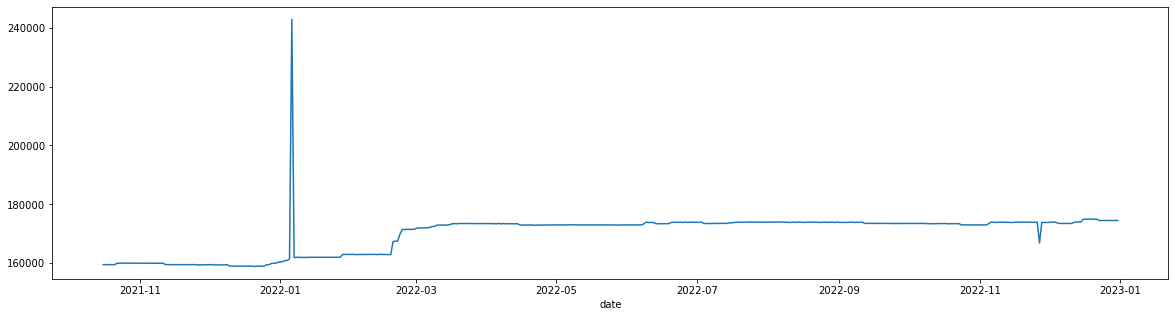

In [36]:
baskets.query("sku_id==874").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='merchant_id'>

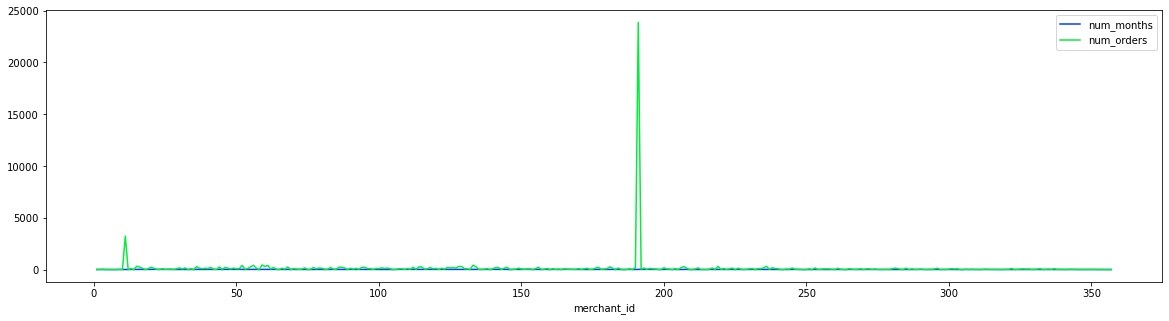

In [37]:
plt.style.use('seaborn-bright')
baskets.groupby(['merchant_id']).agg(
    num_months = ("year_month", "nunique"),
    num_orders = ("order_id", "nunique")).plot(figsize=(20,5))


### inspection of mean price by top level categories
 - need to take mean over all items

In [38]:
baskets.groupby(by='top_cat')['price'].mean()

top_cat
1.0      97580.697252
2.0      21320.363636
3.0      29576.258993
4.0      82935.773206
5.0      84103.356815
6.0      49551.724138
7.0      28565.217391
8.0      42216.867470
9.0      28994.596542
10.0     86334.939256
11.0     10579.418573
12.0     82492.356305
13.0    113974.576271
14.0     89044.576501
15.0     82022.032556
16.0     87878.549228
17.0     56868.246612
18.0     40298.293490
19.0     52304.409820
20.0     85665.354500
21.0     20881.221218
22.0     37205.275531
23.0     41762.303727
24.0     77237.727760
25.0    103773.208743
26.0     87192.381326
27.0    155862.902361
28.0     76928.478825
29.0     69254.997814
30.0     56616.165495
31.0     87500.476948
32.0     37882.910789
33.0     45912.602459
34.0     77723.006302
35.0     41674.176514
Name: price, dtype: float64

In [58]:
baskets.groupby(by='top_cat')['price'].mean().sort_values(ascending=False)

top_cat
27.0    155862.902361
13.0    113974.576271
25.0    103773.208743
1.0      97580.697252
14.0     89044.576501
16.0     87878.549228
31.0     87500.476948
26.0     87192.381326
10.0     86334.939256
20.0     85665.354500
5.0      84103.356815
4.0      82935.773206
12.0     82492.356305
15.0     82022.032556
34.0     77723.006302
24.0     77237.727760
28.0     76928.478825
29.0     69254.997814
17.0     56868.246612
30.0     56616.165495
19.0     52304.409820
6.0      49551.724138
33.0     45912.602459
8.0      42216.867470
23.0     41762.303727
35.0     41674.176514
18.0     40298.293490
32.0     37882.910789
22.0     37205.275531
3.0      29576.258993
9.0      28994.596542
7.0      28565.217391
2.0      21320.363636
21.0     20881.221218
11.0     10579.418573
Name: price, dtype: float64

<AxesSubplot:xlabel='top_cat'>

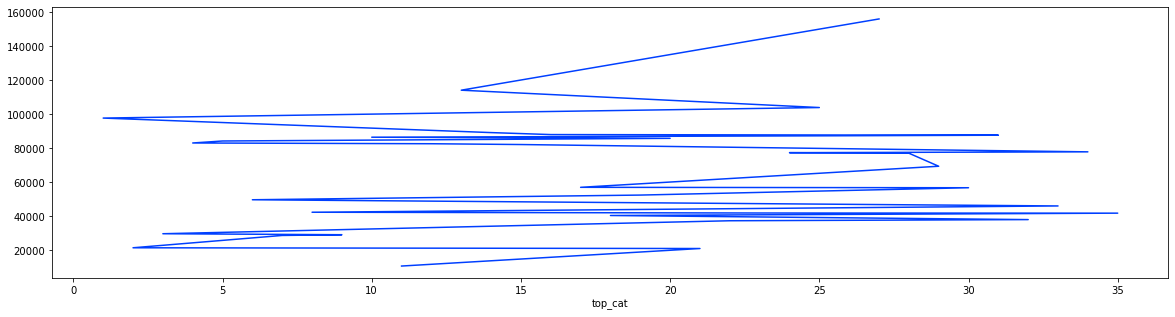

In [60]:
baskets.groupby(by='top_cat')['price'].mean().sort_values(ascending=False).plot(figsize=(20,5))

- hmm, it actually plots the line from top priced category to lowest priced category

<AxesSubplot:>

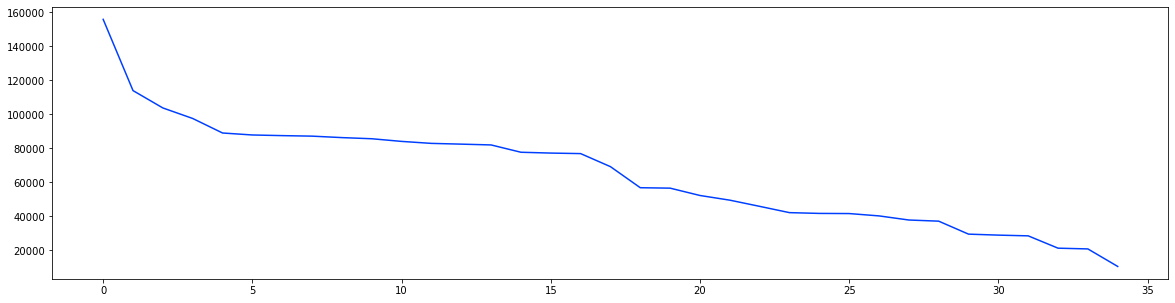

In [61]:
baskets.groupby(by='top_cat')['price'].mean().sort_values(ascending=False).reset_index(drop=True).plot(figsize=(20,5))

 - hmm, but this plot lost the connection of price with the categories, as it is indexed by ranking

<AxesSubplot:xlabel='top_cat'>

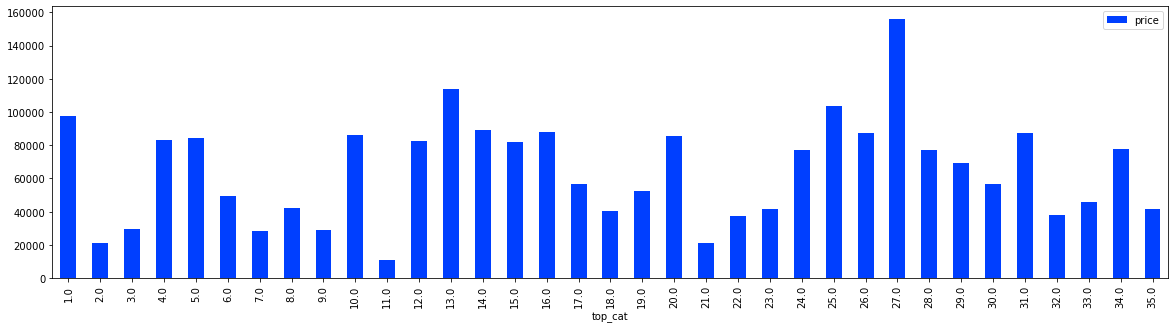

In [41]:
baskets.groupby(by='top_cat')['price'].mean().reset_index().plot.bar(x="top_cat",figsize=(20,5))

 - scatter plot

<AxesSubplot:xlabel='top_cat', ylabel='price'>

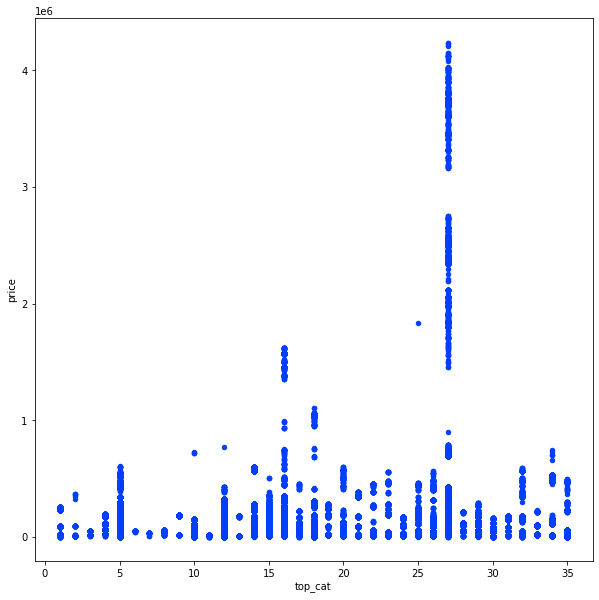

In [63]:
baskets.plot.scatter(x="top_cat",y="price", figsize = (10,10))

 - observe the difference between the above two charts

<AxesSubplot:xlabel='num_days', ylabel='num_skus'>

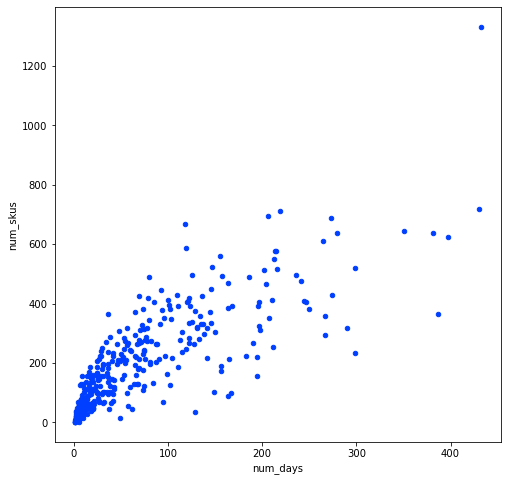

In [42]:
merchant_attributes.plot.scatter(x="num_days",y="num_skus",figsize=(8,8))

<AxesSubplot:>

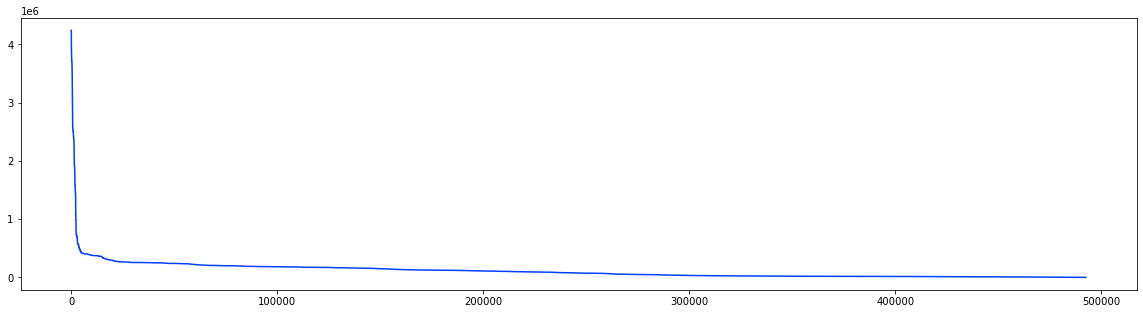

In [43]:
baskets.price.sort_values(ascending = False).reset_index(drop=True).plot(figsize=(20,5))

 - plot the log value of the prices

<AxesSubplot:>

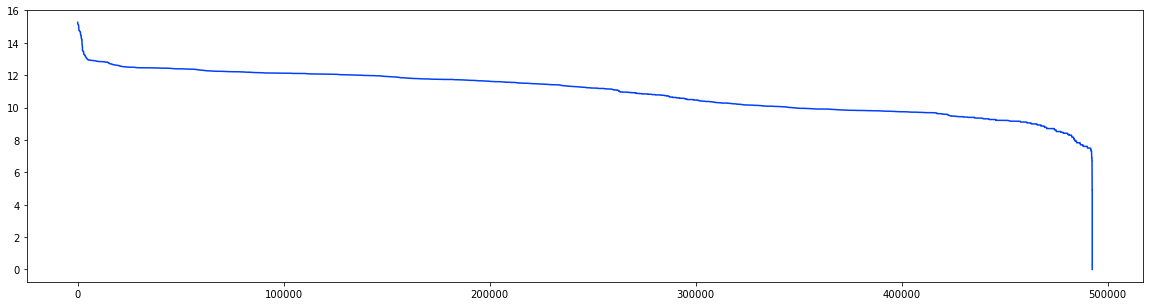

In [44]:
np.log(baskets.price.sort_values(ascending = False).reset_index(drop=True)).plot(figsize=(20,5))

<AxesSubplot:>

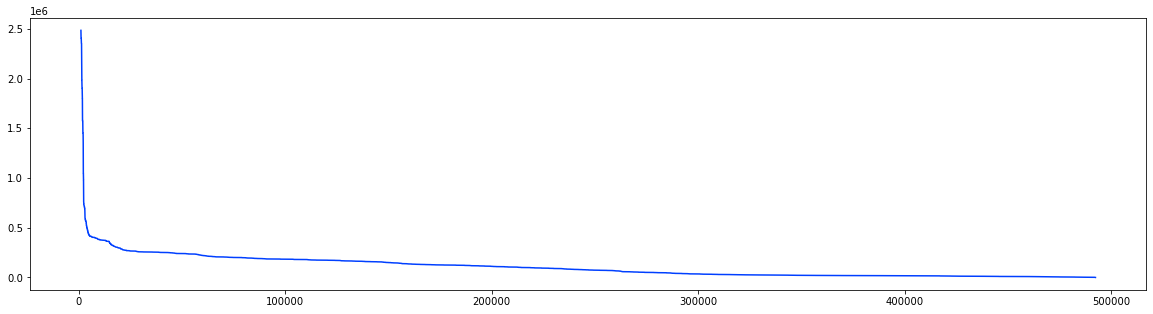

In [45]:
baskets.price.sort_values(ascending = False).reset_index(drop=True)[1000:].plot(figsize=(20,5))

<AxesSubplot:>

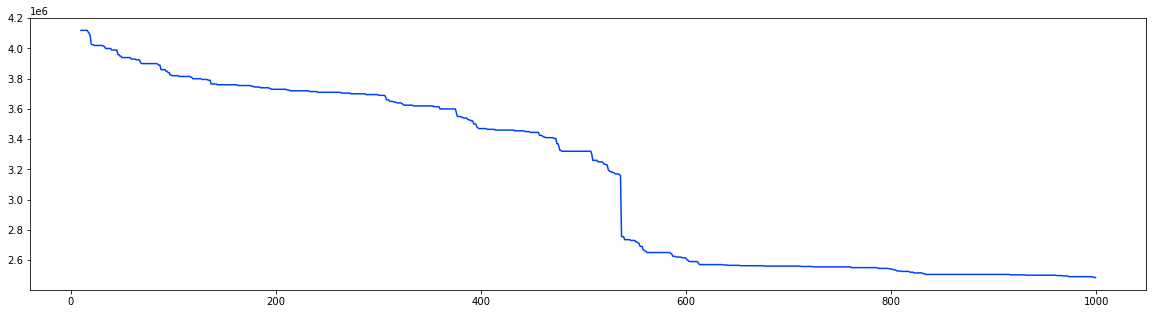

In [46]:
baskets.price.sort_values(ascending = False).reset_index(drop=True)[10:1000].plot(figsize=(20,5))

In [66]:
baskets.rename(columns = {"qty": "quantity"})

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,quantity,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
0,1,1,2021-06-17 14:00:31.373,9,10,27.0,86.0,2,343000.0,686000.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
1,2,1,2021-06-17 14:00:31.373,9,6,27.0,86.0,1,159000.0,159000.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
2,3,1,2021-06-17 14:00:31.373,9,14,27.0,86.0,2,225000.0,450000.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
3,4,1,2021-06-17 14:00:31.373,9,5,27.0,86.0,1,246000.0,246000.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
4,5,2,2021-06-17 14:29:31.918,10,15,27.0,86.0,5,19500.0,97500.0,...,2021-06-17,17,14,3,2021-06,6,2021-24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492432,492433,53438,2022-12-31 18:14:45.659,184,1500,27.0,86.0,5,21000.0,105000.0,...,2022-12-31,31,18,5,2022-12,24,2022-52,52,52,104
492433,492434,53438,2022-12-31 18:14:45.659,184,1655,18.0,61.0,1,38000.0,38000.0,...,2022-12-31,31,18,5,2022-12,24,2022-52,52,52,104
492434,492435,53438,2022-12-31 18:14:45.659,184,1504,27.0,86.0,1,274000.0,274000.0,...,2022-12-31,31,18,5,2022-12,24,2022-52,52,52,104
492435,492436,53438,2022-12-31 18:14:45.659,184,984,27.0,86.0,5,19400.0,97000.0,...,2022-12-31,31,18,5,2022-12,24,2022-52,52,52,104


 - change column names

In [67]:
baskets.columns

Index(['id', 'order_id', 'placed_at', 'merchant_id', 'sku_id', 'top_cat',
       'sub_cat', 'qty', 'price', 'spent', 'datetime', 'year', 'month', 'date',
       'day', 'hour', 'weekday', 'year_month', 'month_num', 'year_week',
       'week_num', 'iso_week_num', 'cum_week_num'],
      dtype='object')

 - change column names need to specify inplace

In [68]:
baskets.rename(columns = {"qty": "quantity"}, inplace = True)
baskets.columns

Index(['id', 'order_id', 'placed_at', 'merchant_id', 'sku_id', 'top_cat',
       'sub_cat', 'quantity', 'price', 'spent', 'datetime', 'year', 'month',
       'date', 'day', 'hour', 'weekday', 'year_month', 'month_num',
       'year_week', 'week_num', 'iso_week_num', 'cum_week_num'],
      dtype='object')